# Table of Contents
1. [Import libraries](#Import-libraries)
2. [Import files, create dataframe and clean](#Import-files,-create-dataframe-and-clean)
3. [Trends analysis](#Trends-analysis)
4. [Statistical analysis by region](#Statistical-analysis-by-region)
5. [Analysis of correlation](#Analysis-of-correlation)
6. [Pearson correlation](#Pearson-correlation)
7. [Linear regression](#Linear-regression)

### Import libraries

In [4]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from helpers import ecdf
from helpers import pearson_r
from helpers import draw_bs_pairs_linreg

### Import files, create dataframe and clean

In [6]:
regions = pd.read_csv(r'Gapminder_data/regions_countries.csv')

regions = regions[['name', 'four_regions', 'World bank, 4 income groups 2017']]
regions.columns = ['country', 'region', 'income_group']

# Clean region data

regions.income_group.replace({'Low income':'low_income', 
                              'Upper middle income':'upper_middle_income', 
                              'High income': 'high_income', 
                              'Lower middle income':'lower_middle_income'}, 
                              inplace = True)

# Create Oceanian countries region
list_oceania = ['Papua New Guinea', 
                'New Zealand', 
                'Fiji', 
                'Solomon Islands', 
                'Vanuatu', 
                'Samoa', 
                'Kiribati', 
                'Micronesia',
                'Tonga', 
                'Palau', 
                'Marshall Islands', 
                'Fed. Sts.', 
                'Nauru', 
                'Tuvalu', 
                'Australia'
                ]

for country in list_oceania:
    regions.loc[regions['country'] == country, ['region']] = 'Oceania'

# Divide Americas by two regions: "South America" and "North America"
list_north_america = ['Canada', 'United States', 'Mexico']

for country in list_north_america:
    regions.loc[regions['country'] == country, ['region']] = 'North_America'

regions.loc[regions['region'] == 'americas', ['region']] = 'South_America'

#Capitalize region names
regions['region'] = regions['region'].str.capitalize()

regions.to_csv('Gapminder_data/regions.csv', index = False)

regions.tail(1)

,country,region,income_group
196,South Sudan,Africa,low_income


In [8]:
# kids_df = pd.read_csv(r'Gapminder_data/kids_per_woman.csv')
kids_df = pd.read_csv(r'Gapminder_data/kids_per_woman.csv')

# Create new df with changes
kids = pd.merge(regions, kids_df, on='country')

list_of_columns_to_exclude = ['country', 'region', 'income_group']
kids.columns = kids.columns.map(lambda x: 'kids_'+x if x not in list_of_columns_to_exclude else x)
kids.tail(1)

,country,region,income_group,kids_1800,kids_1801,kids_1802,kids_1803,kids_1804,kids_1805,kids_1806,...,kids_2091,kids_2092,kids_2093,kids_2094,kids_2095,kids_2096,kids_2097,kids_2098,kids_2099,kids_2100
182,South Sudan,Africa,low_income,6.64,6.64,6.64,6.64,6.64,6.64,6.64,...,2.11,2.1,2.08,2.07,2.06,2.05,2.04,2.03,2.02,2.02


In [10]:
life_exp = pd.read_csv(r'Gapminder_data/life_expectancy_years.csv')
life_exp.columns = life_exp.columns.map(lambda x: 'life_exp_'+x if x!='country' else x)
life_exp.head(1)

,country,life_exp_1800,life_exp_1801,life_exp_1802,life_exp_1803,life_exp_1804,life_exp_1805,life_exp_1806,life_exp_1807,life_exp_1808,...,life_exp_2091,life_exp_2092,life_exp_2093,life_exp_2094,life_exp_2095,life_exp_2096,life_exp_2097,life_exp_2098,life_exp_2099,life_exp_2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7


In [12]:
ch_mort = pd.read_csv(r'Gapminder_data/child_mortality_0_5.csv')
ch_mort.columns = ch_mort.columns.map(lambda x: 'ch_mort_'+x if x!='country' else x)
ch_mort.head(1)

,country,ch_mort_1800,ch_mort_1801,ch_mort_1802,ch_mort_1803,ch_mort_1804,ch_mort_1805,ch_mort_1806,ch_mort_1807,ch_mort_1808,...,ch_mort_2091,ch_mort_2092,ch_mort_2093,ch_mort_2094,ch_mort_2095,ch_mort_2096,ch_mort_2097,ch_mort_2098,ch_mort_2099,ch_mort_2100
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,12.6,12.4,12.2,12.0,11.8,11.6,11.5,11.3,11.1,11.1


In [14]:
inc = pd.read_csv('Gapminder_data/income_per_person.csv')
inc.columns = inc.columns.map(lambda x: 'income_' + x if x!='country' else x)
inc.head(1)

,country,income_1800,income_1801,income_1802,income_1803,income_1804,income_1805,income_1806,income_1807,income_1808,...,income_2031,income_2032,income_2033,income_2034,income_2035,income_2036,income_2037,income_2038,income_2039,income_2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060


In [16]:
#Creating merged data frame for the last century
kids_trends = kids[['country','region','income_group', 'kids_1900', 'kids_1920', 'kids_1940', 'kids_1960', 'kids_1980', 'kids_2000', 'kids_2020']]

ch_mort_trends = ch_mort[['country', 'ch_mort_1900', 'ch_mort_1920', 'ch_mort_1940', 'ch_mort_1960', 'ch_mort_1980', 'ch_mort_2000', 'ch_mort_2020']]

life_exp_trends = life_exp[['country', 'life_exp_1900', 'life_exp_1920', 'life_exp_1940', 'life_exp_1960', 'life_exp_1980', 'life_exp_2000', 'life_exp_2020']]

income_trends = inc[['country', 'income_1900', 'income_1920', 'income_1940', 'income_1960', 'income_1980', 'income_2000', 'income_2020']]

trends_df = pd.merge(kids_trends, ch_mort_trends, on='country')
trends_df = pd.merge(trends_df, life_exp_trends, on='country')
trends_df = pd.merge(trends_df, income_trends, on='country')

trends_df.head(2)

,country,region,income_group,kids_1900,kids_1920,kids_1940,kids_1960,kids_1980,kids_2000,kids_2020,...,life_exp_1980,life_exp_2000,life_exp_2020,income_1900,income_1920,income_1940,income_1960,income_1980,income_2000,income_2020
0,Afghanistan,Asia,low_income,7.0,7.0,7.38,7.45,7.45,7.49,4.04,...,44.1,54.6,64.4,1090,1490,2060,2740,2020,687,1800
1,Albania,Europe,upper_middle_income,4.6,4.6,4.21,6.49,3.62,2.16,1.70,...,71.7,74.9,78.6,1220,1530,1720,2590,4190,5440,13200


### Explore data

In [18]:
trends_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 182
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        183 non-null    object 
 1   region         183 non-null    object 
 2   income_group   183 non-null    object 
 3   kids_1900      183 non-null    float64
 4   kids_1920      183 non-null    float64
 5   kids_1940      183 non-null    float64
 6   kids_1960      183 non-null    float64
 7   kids_1980      183 non-null    float64
 8   kids_2000      183 non-null    float64
 9   kids_2020      183 non-null    float64
 10  ch_mort_1900   183 non-null    float64
 11  ch_mort_1920   183 non-null    float64
 12  ch_mort_1940   183 non-null    float64
 13  ch_mort_1960   183 non-null    float64
 14  ch_mort_1980   183 non-null    float64
 15  ch_mort_2000   183 non-null    float64
 16  ch_mort_2020   183 non-null    float64
 17  life_exp_1900  183 non-null    float64
 18  life_exp_1

### Trends analysis

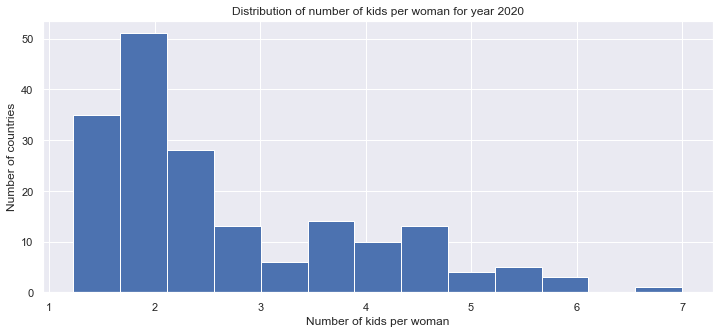

In [20]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set()

year_2020 = trends_df[['country', 'region', 'income_group', 'kids_2020']]

# Compute number of data points: n_data
n_data = len(year_2020)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
plt.hist(year_2020['kids_2020'], bins=n_bins)

# Label axes
plt.xlabel('Number of kids per woman')
plt.ylabel('Number of countries')

# _ = plt.legend()
plt.title('Distribution of number of kids per woman for year 2020')

plt.savefig('Charts/hist_kids_2020.jpg')
plt.show()

In [22]:
### Year trends
century_trends = kids[['country', 'region', 'kids_1900', 'kids_1920', 'kids_1940', 'kids_1960','kids_1980', 'kids_2000', 'kids_2020']]

century_trends = century_trends.groupby('region').mean()
century_trends.index.names = ['']
century_trends.columns = ['1900', '1920', '1940', '1960', '1980', '2000', '2020']

century_trends = century_trends.transpose()
century_trends.head(2)

,Africa,Asia,Europe,North_america,Oceania,South_america
1900,6.397778,6.286364,5.021860,4.896667,5.772222,5.878667
1920,6.387593,6.254091,4.245814,4.220000,5.575556,5.810333


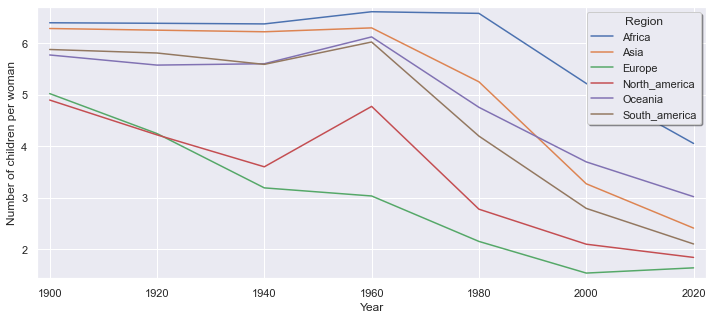

In [24]:
# Plotting timeseries of trends
fig, ax = plt.subplots(figsize=(12,5))

# Plot all trends on the same plot
plt.plot(century_trends)

# Annotate the plot
plt.legend(title='Region', labels=century_trends.columns, loc='upper right', shadow=True)
plt.xlabel('Year')
plt.ylabel('Number of children per woman')

plt.margins(0.02)

plt.savefig('Charts/trends_kids.jpg')
plt.show()

### Statistical analysis by region

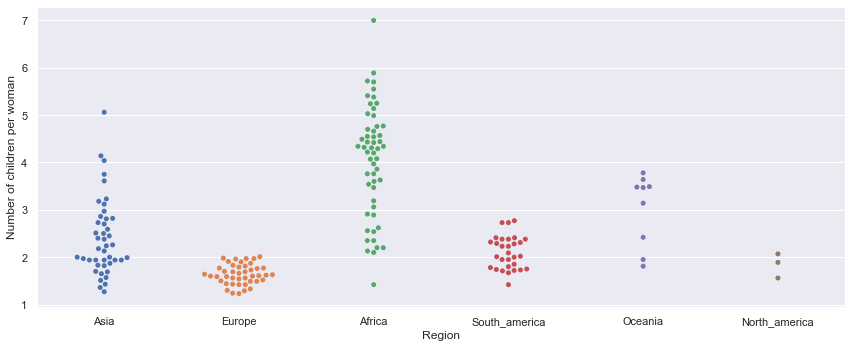

In [26]:
fig, ax = plt.subplots(figsize=(12,5))

sns.swarmplot(x='region', y='kids_2020', data=year_2020)

plt.xlabel('Region')
plt.ylabel('Number of children per woman')

plt.tight_layout()

plt.savefig('Charts/swarmplot_kids_by_region_2020.jpg')
plt.show()

# Fertility of Africa region tends to be the biggest and with the broader range.

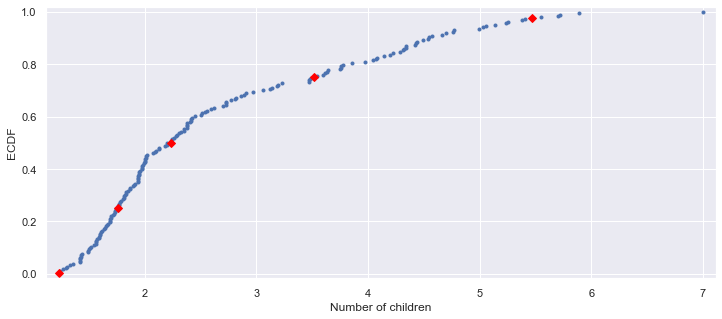

In [28]:
# ECDF plotting
fig, ax = plt.subplots(figsize=(12,5))

x, y = ecdf(year_2020['kids_2020'])

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Number of children')
plt.ylabel('ECDF')

percentiles = np.array([0.25, 25, 50, 75, 97.5])
perc_2020 = np.percentile(year_2020['kids_2020'], percentiles)

# Overlay percentiles as red diamonds.
plt.plot(perc_2020, 
         percentiles/100, 
         marker='D', 
         color='red',
         linestyle='none')

plt.savefig('Charts/ecdf_2020.jpg')

plt.margins(0.02)
plt.show()

In [30]:
print(perc_2020)

[1.23455 1.755   2.23    3.515   5.473  ]


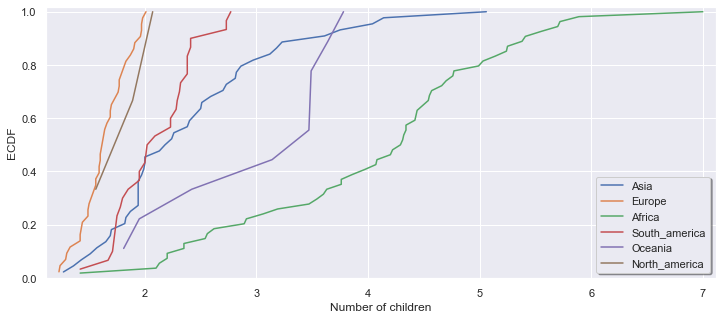

In [32]:
# Plotting ECDF
fig, ax = plt.subplots(figsize=(12,5))

regions_list = year_2020['region'].unique()

# Plot all ECDFs on the same plot
for region in regions_list:
    data = year_2020[year_2020['region'] == region]['kids_2020']
    x, y = ecdf(data)
    plt.plot(x, y, label=region)

# Annotate the plot
plt.legend(loc='lower right', shadow=True)
plt.xlabel('Number of children')
plt.ylabel('ECDF')

plt.margins(0.02)

plt.savefig('Charts/ecdf_by_region_2020.jpg')
plt.show()

#The ECDFs expose clear differences among the fertility rate in different regions. Sub_Saharan Africa region shows much bigger fertility rate in comparison to regions, also with less absolute variability in pnumber of kids in Europe $ Central Asia and Latin America&Caribbean and North America regions.

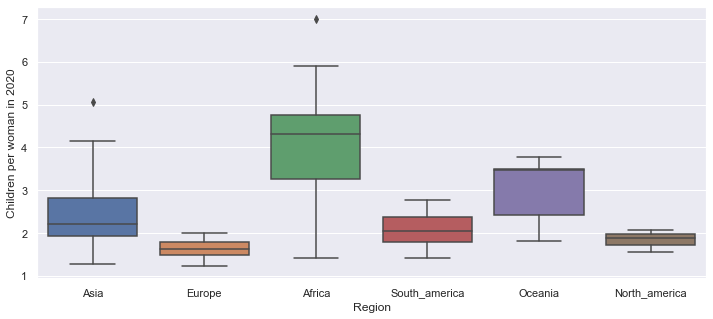

In [34]:
fig, ax = plt.subplots(figsize=(12,5))

sns.boxplot(x='region', y='kids_2020', data=year_2020)

plt.xlabel('Region')
plt.ylabel('Children per woman in 2020')

plt.savefig('Charts/boxplot_kids_2020.jpg')
plt.show()

### Analysis of correlation

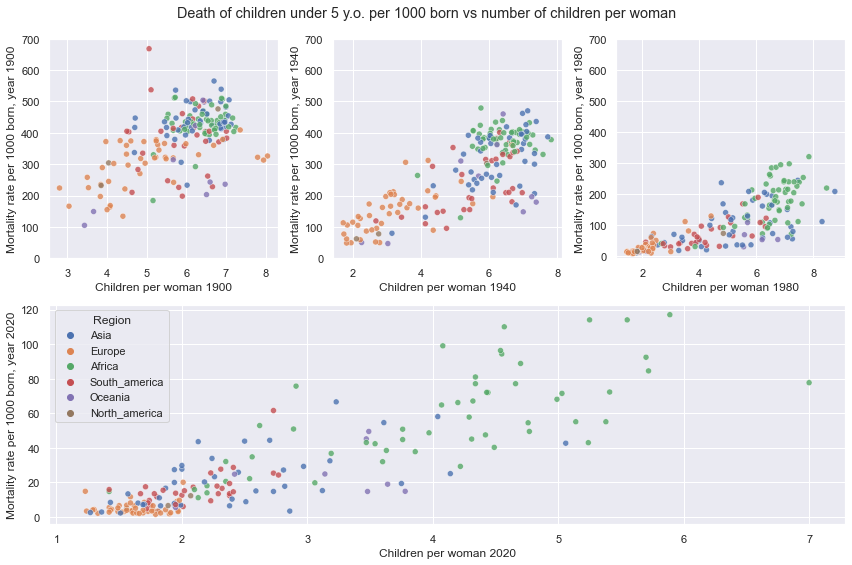

In [36]:
fig, axes = plt.subplots(figsize = (12,8), sharey=True)
fig.suptitle('Death of children under 5 y.o. per 1000 born vs number of children per woman')
sns.set()

yticks = [0, 100, 200, 300, 400, 500, 600, 700]

plt.subplot(231)
y_1900 = sns.scatterplot(x='kids_1900', 
                         y='ch_mort_1900', 
                         hue='region', 
                         data=trends_df,  
                         alpha=0.8, 
                         legend=False)
plt.xlabel('Children per woman 1900')
plt.ylabel('Mortality rate per 1000 born, year 1900')
plt.yticks(yticks)

plt.subplot(232)
y_1940 = sns.scatterplot(x='kids_1940', 
                         y='ch_mort_1940', 
                         hue='region', 
                         data=trends_df,  
                         alpha=0.8, 
                         legend=False)
plt.xlabel('Children per woman 1940')
plt.ylabel('Mortality rate per 1000 born, year 1940')
plt.yticks(yticks)

plt.subplot(233)
y_1980 = sns.scatterplot(x='kids_1980', 
                         y='ch_mort_1980', 
                         hue='region', 
                         data=trends_df,  
                         alpha=0.8, 
                         legend=False)
plt.xlabel('Children per woman 1980')
plt.ylabel('Mortality rate per 1000 born, year 1980')
plt.yticks(yticks)

plt.subplot(212)
y_2020 = sns.scatterplot(x='kids_2020', 
                         y='ch_mort_2020', 
                         hue='region', 
                         data=trends_df,  
                         alpha=0.8)
plt.xlabel('Children per woman 2020')
plt.ylabel('Mortality rate per 1000 born, year 2020')
plt.legend(title='Region')

plt.tight_layout()

plt.savefig('Charts/correlation_trends.jpg')
plt.show()

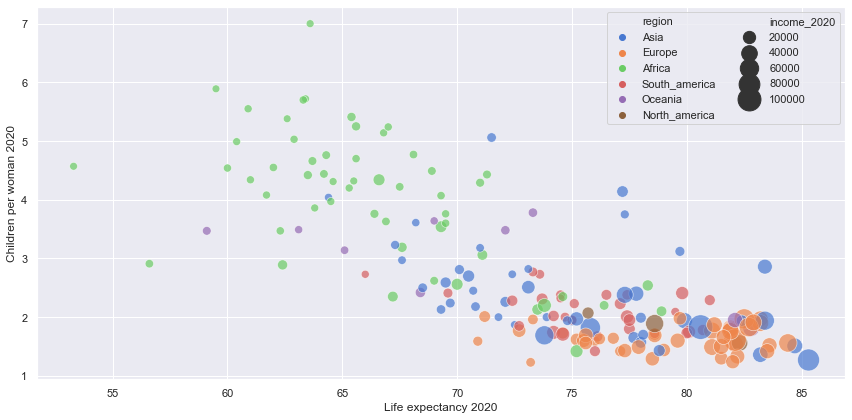

In [38]:
fig = plt.figure(figsize=(12,6))
sns.set()

sns.scatterplot('life_exp_2020', 
                'kids_2020', 
                hue='region', 
                size='income_2020', 
                data=trends_df,
                sizes=(60, 600), 
                alpha=0.7, 
                palette='muted', 
                legend=True)

plt.xlabel('Life expectancy 2020')
plt.ylabel('Children per woman 2020')

plt.legend(loc='upper right', ncol=2)

plt.tight_layout()

plt.savefig('Charts/kids_life_exp_2020.jpg')
plt.show()

### Pearson correlation

Pearson correlation of number of children per woman and life expectancy in 2020 is: -0.7779785319571607


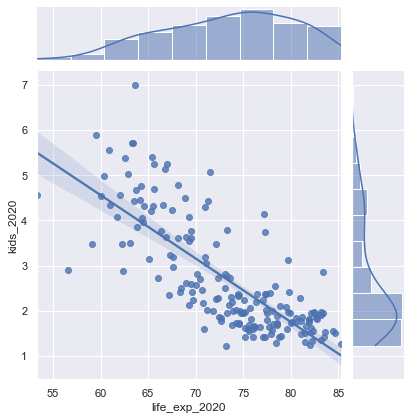

In [40]:
sns.jointplot(trends_df['life_exp_2020'],trends_df['kids_2020'], kind = 'reg')
r = pearson_r(trends_df['kids_2020'], trends_df['life_exp_2020'])
print('Pearson correlation of number of children per woman and life expectancy in 2020 is:', r)
plt.show()

Pearson correlation of life expectancy and income in 2020 is: 0.6834477410809363


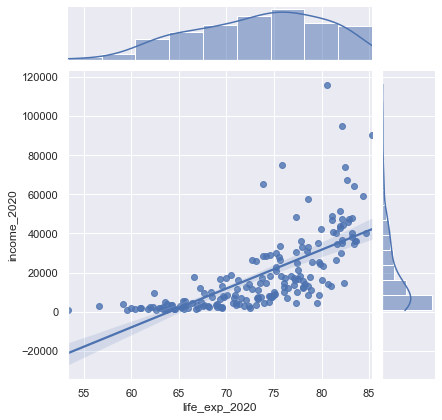

In [42]:
sns.jointplot(trends_df['life_exp_2020'],trends_df['income_2020'], kind = 'reg')
r = pearson_r(trends_df['life_exp_2020'], trends_df['income_2020'])
print('Pearson correlation of life expectancy and income in 2020 is:', r)
plt.show()

Pearson correlation of number of children per woman and income in 2020 is: -0.5462756449404138


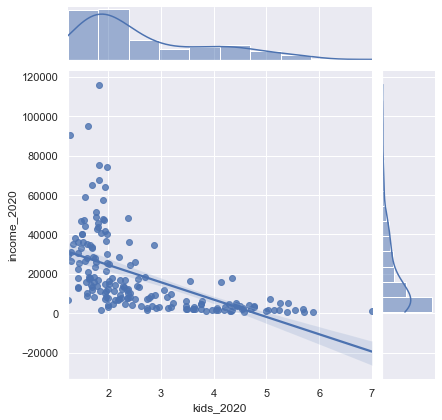

In [44]:
sns.jointplot(trends_df['kids_2020'],trends_df['income_2020'], kind = 'reg')
r = pearson_r(trends_df['kids_2020'], trends_df['income_2020'])
print('Pearson correlation of number of children per woman and income in 2020 is:', r)
plt.show()

Pearson correlation of kids mortality and number of children per woman is: 0.8598370398781572


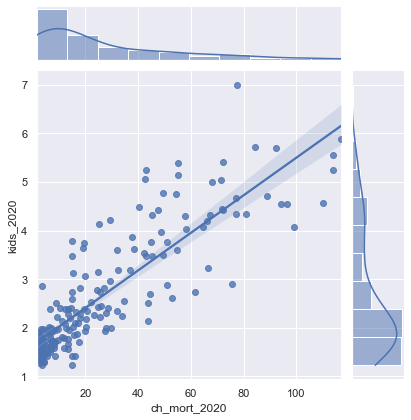

In [46]:
sns.jointplot(trends_df['ch_mort_2020'], trends_df['kids_2020'], kind = 'reg')
r = pearson_r(trends_df['ch_mort_2020'], trends_df['kids_2020'])
print('Pearson correlation of kids mortality and number of children per woman is:', r)
plt.show()

### Linear regression

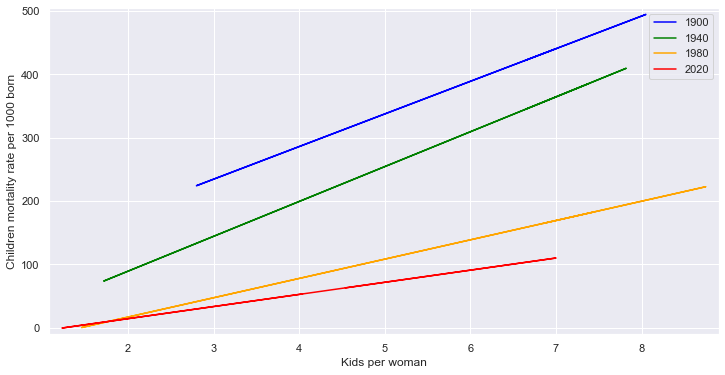

In [47]:
fig, ax = plt.subplots(figsize=(12,6))

# Perform a linear regression:

#1900
slope, intercept = np.polyfit(trends_df.kids_1900, 
                              trends_df.ch_mort_1900, 1)
x = trends_df.kids_1900
y = slope * x + intercept
plt.plot(x, y, label='1900', color='blue')

#1940
slope, intercept = np.polyfit(trends_df.kids_1940, 
                              trends_df.ch_mort_1940, 1)
x = trends_df.kids_1940
y = slope * x + intercept
plt.plot(x, y, label='1940', color='green')

#1980
slope, intercept = np.polyfit(trends_df.kids_1980, 
                              trends_df.ch_mort_1980, 1)
x = trends_df.kids_1980
y = slope * x + intercept
plt.plot(x, y, label='1980', color='orange')

#2020
slope, intercept = np.polyfit(trends_df.kids_2020, 
                              trends_df.ch_mort_2020, 1)
x = trends_df.kids_2020 
y = slope * x + intercept
plt.plot(x, y, label='2020', color='red')


plt.xlabel('Kids per woman')
plt.ylabel('Children mortality rate per 1000 born')
plt.legend()

plt.margins(0.02)

plt.savefig('Charts/trends_century_fert_mort.jpg')
plt.show()


95pct confidential interval [16.68863012 21.83598786]


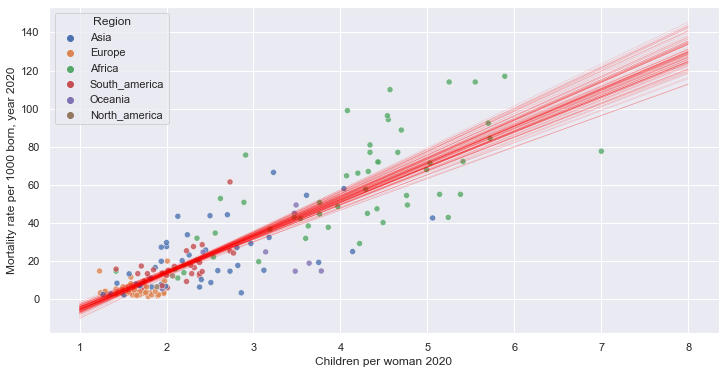

In [48]:
fig, ax = plt.subplots(figsize=(12,6))

# # Generate array of x-values for bootstrap lines: x
x = np.array([1,8])

# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(trends_df.kids_2020, 
                                                        trends_df.ch_mort_2020, 
                                                        100)

# Compute and print 95% CI for slope
print('95pct confidential interval', np.percentile(bs_slope_reps, [2.5,97.5]))

y_2020 = sns.scatterplot(x='kids_2020', 
                         y='ch_mort_2020', 
                         hue='region', 
                         data=trends_df,  
                         alpha=0.8)
plt.xlabel('Children per woman 2020')
plt.ylabel('Mortality rate per 1000 born, year 2020')
plt.legend(title='Region')

# # Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
             linewidth=0.5, alpha=0.2, color='red')

plt.savefig('Charts/bootstrap_regions.jpg')
plt.show()